In [65]:
#imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn import model_selection


print(tf.__version__)

2.15.0


In [21]:
#import data
train_dir = './asl_alphabet_train'
test_dir = './asl_alphabet_test'


In [39]:
#get data
def get_data(dir):
    images = []
    labels = []
    dir_list = os.listdir(dir)
    for index, letter_dir in enumerate(dir_list):
        print("Getting images of", letter_dir)
        for file in os.listdir(dir + '/' + letter_dir):
            filepath = dir + '/' + letter_dir + '/' + file
            image = cv2.resize(cv2.imread(filepath), (32, 32))
            images.append(image)
            labels.append(index)
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

In [ ]:
X, y = get_data(train_dir)

In [43]:
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 
           'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 
           'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']

In [59]:
print("X shape:", X.shape)
print("y length:", len(y))


X shape: (87000, 32, 32, 3)
y length: 87000


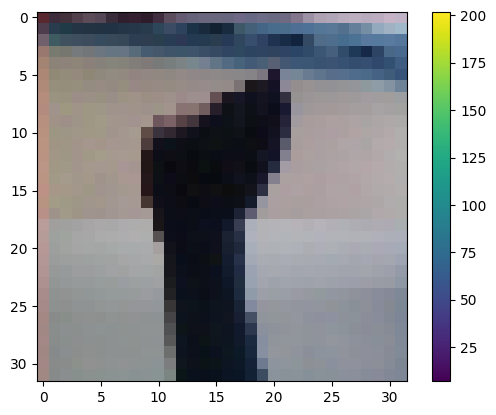

0
255


In [64]:
plt.Figure()
plt.imshow(X[0])
plt.colorbar()
plt.show()

In [66]:
#preprocess data
def preprocess_data(X, y):
    # normalize the rgb values, our filter should have 3 channels, red, green, blue. that has a range of 0-255
    # if we want to feed it in to the neural network we should noramlize it to a value between 0-1 by dividing by 255
    normailzed_X = X/255.0
    # our input set is encoded as the following (labels) A, B, C = 0, 1, 2
    # however keras doesn't accept this encoding so we must convert our array of labels y into a 2d array 
    # where each column in a row corresponds to an int, and if the label corresponds to that int a 1 will go in that column, 0 if not
    # this is called hot encoding
    
    #X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

SyntaxError: invalid syntax (653598327.py, line 2)